   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

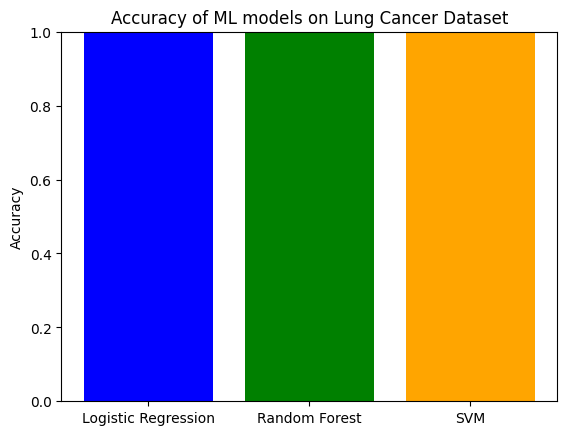

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/cancer patient data sets.csv')


print(df.head())


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])


if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, preds)

print(accuracies)


plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Accuracy of ML models on Lung Cancer Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
